## Обучение без учителя

### Задание 1

Импортируйте библиотеки `pandas` и `numpy`.

Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки `sklearn`. Создайте датафреймы **X** и **Y** из этих данных.

Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)` с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял **20%** от всех данных, при этом аргумент `random_state` должен быть равен **42**.

Масштабируйте данные с помощью `StandardScaler`.

Постройте модель TSNE на тренировочный данных с параметрами: `n_components=2, learning_rate=250, random_state=42`.
Постройте диаграмму рассеяния на этих данных.

In [308]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


warnings.filterwarnings('ignore')

RANDOM_STATE = 42

In [14]:
boston = load_boston()
data = boston["data"]
feature_names = boston.feature_names
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [127]:
X = pd.DataFrame(data=boston.data, columns=boston['feature_names'])
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [51]:
Y = pd.DataFrame(data=boston.target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
print(X.info(),'\n'), print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None


(None, None)

In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_STATE)

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [307]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [56]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=RANDOM_STATE)

In [57]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [136]:
X_train_tsne[:2, :]

array([[18.104149 , 29.184141 ],
       [ 3.3644612, -7.9096684]], dtype=float32)

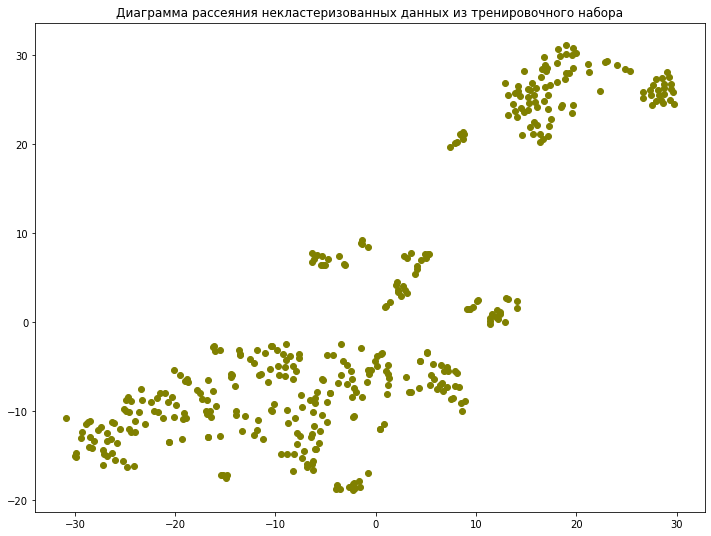

In [309]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c='olive')
plt.title("Диаграмма рассеяния некластеризованных данных из тренировочного набора")
plt.show()

### Задание 2

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма **X_train**.
Параметр `max_iter` должен быть равен **100**, `random_state` сделайте равным **42**.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения `price` и `CRIM` в разных кластерах.


In [144]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=RANDOM_STATE)

In [305]:
train_labels = kmeans.fit_predict(X_train_scaled)

In [146]:
pd.value_counts(train_labels)

2    191
1    127
0     86
dtype: int64

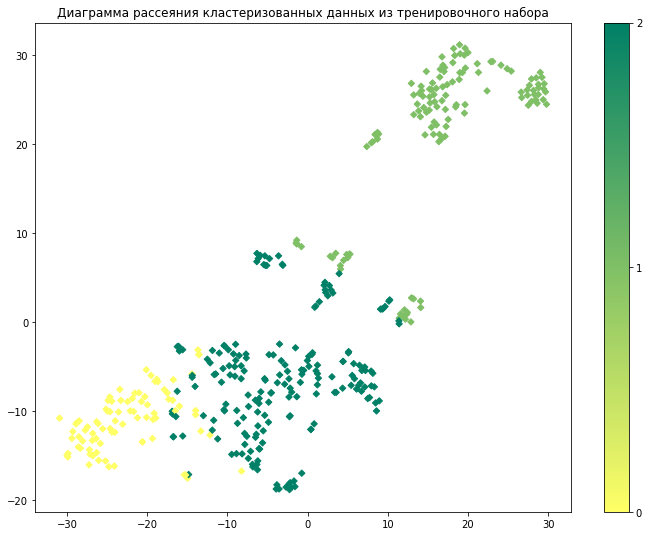

In [310]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=20, marker="D", c=train_labels, cmap='summer_r')
plt.title('Диаграмма рассеяния кластеризованных данных из тренировочного набора')
plt.colorbar(ticks=[0, 1, 2])
plt.show()

In [43]:
print(f"Mean CRIM of cluster 0 (train): {X_train.loc[train_labels==0, 'CRIM'].mean()}\n")
print(f"Mean CRIM of cluster 1 (train): {X_train.loc[train_labels==1, 'CRIM'].mean()}\n")
print(f"Mean CRIM of cluster 2 (train): {X_train.loc[train_labels==2, 'CRIM'].mean()}\n")

Mean crime of cluster 0 (train): 0.07356558139534884

Mean crime of cluster 1 (train): 10.797028425196851

Mean crime of cluster 2 (train): 0.4216602094240837



In [45]:
print(f"Mean price of cluster 0 (train): {Y_train[train_labels==0].mean()}\n")
print(f"Mean price of cluster 1 (train): {Y_train[train_labels==1].mean()}\n")
print(f"Mean price of cluster 2 (train): {Y_train[train_labels==2].mean()}\n")

Mean price of cluster 0 (train): price    27.788372
dtype: float64

Mean price of cluster 1 (train): price    16.165354
dtype: float64

Mean price of cluster 2 (train): price    24.958115
dtype: float64



### Задание 3

Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [46]:
test_labels = kmeans.predict(X_test_scaled)

In [47]:
pd.value_counts(test_labels)

2    51
1    35
0    16
dtype: int64

In [48]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

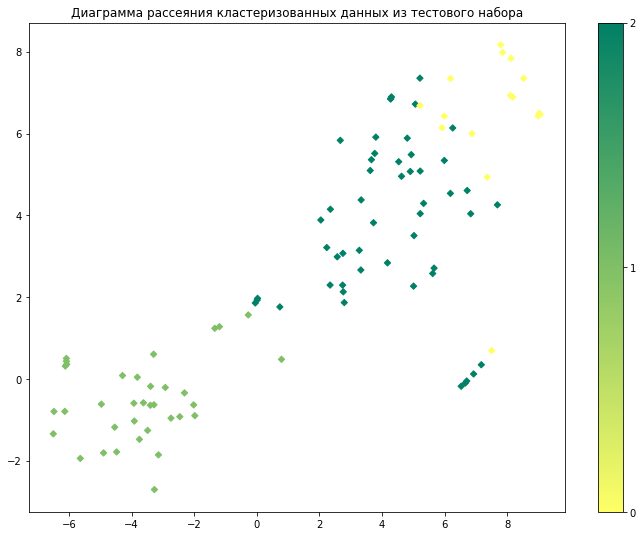

In [311]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], s=20, marker="D", c=test_labels, cmap='summer_r')
plt.title('Диаграмма рассеяния кластеризованных данных из тестового набора')
plt.colorbar(ticks=[0, 1, 2])
plt.show()

In [65]:
print(f"Mean CRIM of cluster 0 (test): {X_test.loc[test_labels==0, 'CRIM'].mean()}\n")
print(f"Mean CRIM of cluster 1 (test): {X_test.loc[test_labels==1, 'CRIM'].mean()}\n")
print(f"Mean CRIM of cluster 2 (test): {X_test.loc[test_labels==2, 'CRIM'].mean()}\n")

Mean crime of cluster 0 (test): 0.06206

Mean crime of cluster 1 (test): 10.165531142857143

Mean crime of cluster 2 (test): 0.2660788235294118



In [67]:
print(f"Mean price of cluster 0 (test): {Y_test[test_labels==0].mean()}\n")
print(f"Mean price of cluster 1 (test): {Y_test[test_labels==1].mean()}\n")
print(f"Mean price of cluster 2 (test): {Y_test[test_labels==2].mean()}\n")

Mean price of cluster 0 (test): price    31.35
dtype: float64

Mean price of cluster 1 (test): price    16.437143
dtype: float64

Mean price of cluster 2 (test): price    21.860784
dtype: float64

